In [ ]:
get_ipython().system('pip install hurst fbprophet matplotlib yfinance numpy statsmodels datetime pandas_market_calendars')


In [1]:


import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import datetime
from datetime import timedelta
from datetime import date
import pandas_ta as ta
import statsmodels.tsa.stattools as ts
from hurst import compute_Hc
from fbprophet import Prophet
import pandas_market_calendars as mcal
from finta import TA

import os.path
from os import path

from scipy.stats import ttest_ind
from numpy import cumsum

import concurrent.futures
from concurrent.futures import wait, ALL_COMPLETED


from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
%matplotlib inline

pd.set_option('display.max_columns', None) #replace n with the number of columns you want to see completely
pd.set_option('display.max_rows', None) #replace n with the number of rows you want to see completely


/usr/local/lib/python3.6/dist-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



In [2]:


n_forward = 7
name = 'BTC-USD'
#name = 'GLD'
#name = 'SPY'
#name = 'GOOG'

#strategy = "EMA"
strategy = "SMA"
#indicator = 'Close'
indicator = 'VWP'

w=117
#end_date = datetime.date.today()
end_date = datetime.date.today() - timedelta(weeks=w)
end_date1 = end_date - timedelta(weeks=w)
start_date = end_date1 - timedelta(weeks=w)


datetime.date(2014, 6, 17)

In [36]:
ticker.history(interval="1d",start=start_date,end=end_date+timedelta(days=1), auto_adjust=True)

Open      High       Low     Close       Volume  Dividends  \
Date                                                                         
2014-09-17    465.86    468.17    452.42    457.33     21056800          0   
2014-09-18    456.86    456.86    413.10    424.44     34483200          0   
2014-09-19    424.10    427.83    384.53    394.80     37919700          0   
2014-09-20    394.67    423.30    389.88    408.90     36863600          0   
2014-09-21    408.08    412.43    393.18    398.82     26580100          0   
2014-09-22    399.10    406.92    397.13    402.15     24127600          0   
2014-09-23    402.09    441.56    396.20    435.79     45099500          0   
2014-09-24    435.75    436.11    421.13    423.20     30627700          0   
2014-09-25    423.16    423.52    409.47    411.57     26814400          0   
2014-09-26    411.43    414.94    400.01    404.42     21460800          0   
2014-09-27    403.56    406.62    397.37    399.52     15029300          0   
2014-09-28    399.47    401.02    374.33    377.18     23613300          0   
2014-09-29    376.93    385.21    372.24    375.47     32497700          0   
2014-09-30    376.09    390.98    373.44    386.94     34707300          0   
2014-10-01    387.43    391.38    380.78    383.61     26229400          0   
2014-10-02    383.99    385.50    372.95    375.07     21777700          0   
2014-10-03    375.18    377.70    357.86    359.51     30901200          0   
2014-10-04    359.89    364.49    325.89    328.87     47236500          0   
2014-10-05    328.92    341.80    289.30    320.51     83308096          0   
2014-10-06    320.39    345.13    302.56    330.08     79011800          0   
2014-10-07    330.58    339.25    320.48    336.19     49199900          0   
2014-10-08    336.12    354.36    327.19    352.94     54736300          0   
2014-10-09    352.75    382.73    347.69    365.03     83641104          0   
2014-10-10    364.69    375.07    352.96    361.56     43665700          0   
2014-10-11    361.36    367.19    355.95    362.30     13345200          0   
2014-10-12    362.61    379.43    356.14    378.55     17552800          0   
2014-10-13    377.92    397.23    368.90    390.41     35221400          0   
2014-10-14    391.69    411.70    391.32    400.87     38491500          0   
2014-10-15    400.95    402.23    388.77    394.77     25267100          0   
2014-10-16    394.52    398.81    373.07    382.56     26990000          0   
2014-10-17    382.76    385.48    375.39    383.76     13600700          0   
2014-10-18    383.98    395.16    378.97    391.44     11416800          0   
2014-10-19    391.25    393.94    386.46    389.55      5914570          0   
2014-10-20    389.23    390.08    378.25    382.85     16419000          0   
2014-10-21    382.42    392.65    380.83    386.48     14188900          0   
2014-10-22    386.12    388.58    382.25    383.16     11641300          0   
2014-10-23    382.96    385.05    356.45    358.42     26456900          0   
2014-10-24    358.59    364.35    353.30    358.35     15585700          0   
2014-10-25    358.61    359.86    342.88    347.27     18127500          0   
2014-10-26    347.49    359.22    343.93    354.70     11272500          0   
2014-10-27    354.78    358.63    349.81    352.99     13033000          0   
2014-10-28    353.21    359.98    352.68    357.62      7845880          0   
2014-10-29    357.09    357.83    335.34    335.59     18192700          0   
2014-10-30    335.71    350.91    335.07    345.30     30177900          0   
2014-10-31    345.01    348.05    337.14    338.32     12545400          0   
2014-11-01    338.65    340.53    321.05    325.75     16677200          0   
2014-11-02    326.08    329.05    320.63    325.89      8603620          0   
2014-11-03    325.57    334.00    325.48    327.55     12948500          0   
2014-11-04    327.16    331.77    325.08    330.49     15655500          0   
2014-11-05    330.68    343.37    330.

In [3]:
cores = int(len(os.sched_getaffinity(0)))

nyse = mcal.get_calendar('NYSE')
nyse_trading_dates= nyse.schedule(start_date=start_date, end_date=(end_date+timedelta(days=n_forward+5)))

ticker = yfinance.Ticker(name)
data = ticker.history(interval="1d",start=start_date,end=end_date+timedelta(days=1), auto_adjust=True)
data['Forward Close'] = data['Close'].shift(-n_forward)
data['Forward Return'] = (data['Forward Close'] - data['Close'])/data['Close']
data['VWP'] = data['Close']*data['Volume']

Short_EVWMA = pd.DataFrame(TA.EVWMA(data,12))
Long_EVWMA = pd.DataFrame(TA.EVWMA(data,26))
Short_EVWMA.columns = ['EVWMA_12']
Long_EVWMA.columns = ['EVWMA_26']

#p 209 of ttr doc
MACD_EVWMA = pd.DataFrame((Short_EVWMA['EVWMA_12'] - Long_EVWMA['EVWMA_26'])/(Long_EVWMA['EVWMA_26']))
MACD_EVWMA.columns = ['MACD-line']

Signal_EVWMA = pd.DataFrame(ta.ema(MACD_EVWMA["MACD-line"], length=9))
Signal_EVWMA.columns = ['Signal_EMA_9_MACD']
data['MACD_Signal'] = Signal_EVWMA

benchName = "^GSPC"
bench = yfinance.Ticker(benchName)
#bench Data needs to be +1 because it ends the day before end_date
benchData = bench.history(interval="1d",start=start_date,end=end_date+timedelta(days=1), auto_adjust=True)

len(benchData)
len(data)



/usr/local/lib/python3.6/dist-packages/pandas/core/internals/construction.py:791: FutureWarning:

Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.



1548

In [4]:


dateindex = data.loc[start_date:end_date].index

dateindex_n_forward = [start_date + datetime.timedelta(days=x) for x in range(0, ((end_date+ timedelta(days=n_forward+5))-start_date).days)]




In [5]:

if(len(data)>len(nyse_trading_dates)):
    frequency=pd.DataFrame(dateindex_n_forward).set_index(0).index
    
else:
    frequency=nyse_trading_dates.reset_index().set_index('index').rename_axis([None]).index

#https://stackoverflow.com/questions/40815238/python-pandas-convert-index-to-datetime
#frequency = pd.to_datetime(frequency, errors='coerce')


In [6]:
#will help later with bad data during loops

prices = benchData
df = prices.rename_axis([None]).reindex(frequency)
df = df.interpolate(method='linear')
#[start_date:end_date]
benchData = df



In [38]:
#will help later with bad data during loops

prices = data
df = prices.rename_axis([None]).reindex(frequency)
df = df.interpolate(method='linear')
data = df.dropna()
#data = df[start_date:end_date]


datetime.date(2014, 6, 17)

In [39]:
data

Open      High       Low     Close        Volume  Dividends  \
0                                                                             
2014-09-25    423.16    423.52    409.47    411.57  2.681440e+07        0.0   
2014-09-26    411.43    414.94    400.01    404.42  2.146080e+07        0.0   
2014-09-27    403.56    406.62    397.37    399.52  1.502930e+07        0.0   
2014-09-28    399.47    401.02    374.33    377.18  2.361330e+07        0.0   
2014-09-29    376.93    385.21    372.24    375.47  3.249770e+07        0.0   
2014-09-30    376.09    390.98    373.44    386.94  3.470730e+07        0.0   
2014-10-01    387.43    391.38    380.78    383.61  2.622940e+07        0.0   
2014-10-02    383.99    385.50    372.95    375.07  2.177770e+07        0.0   
2014-10-03    375.18    377.70    357.86    359.51  3.090120e+07        0.0   
2014-10-04    359.89    364.49    325.89    328.87  4.723650e+07        0.0   
2014-10-05    328.92    341.80    289.30    320.51  8.330810e+07        0.0   
2014-10-06    320.39    345.13    302.56    330.08  7.901180e+07        0.0   
2014-10-07    330.58    339.25    320.48    336.19  4.919990e+07        0.0   
2014-10-08    336.12    354.36    327.19    352.94  5.473630e+07        0.0   
2014-10-09    352.75    382.73    347.69    365.03  8.364110e+07        0.0   
2014-10-10    364.69    375.07    352.96    361.56  4.366570e+07        0.0   
2014-10-11    361.36    367.19    355.95    362.30  1.334520e+07        0.0   
2014-10-12    362.61    379.43    356.14    378.55  1.755280e+07        0.0   
2014-10-13    377.92    397.23    368.90    390.41  3.522140e+07        0.0   
2014-10-14    391.69    411.70    391.32    400.87  3.849150e+07        0.0   
2014-10-15    400.95    402.23    388.77    394.77  2.526710e+07        0.0   
2014-10-16    394.52    398.81    373.07    382.56  2.699000e+07        0.0   
2014-10-17    382.76    385.48    375.39    383.76  1.360070e+07        0.0   
2014-10-18    383.98    395.16    378.97    391.44  1.141680e+07        0.0   
2014-10-19    391.25    393.94    386.46    389.55  5.914570e+06        0.0   
2014-10-20    389.23    390.08    378.25    382.85  1.641900e+07        0.0   
2014-10-21    382.42    392.65    380.83    386.48  1.418890e+07        0.0   
2014-10-22    386.12    388.58    382.25    383.16  1.164130e+07        0.0   
2014-10-23    382.96    385.05    356.45    358.42  2.645690e+07        0.0   
2014-10-24    358.59    364.35    353.30    358.35  1.558570e+07        0.0   
2014-10-25    358.61    359.86    342.88    347.27  1.812750e+07        0.0   
2014-10-26    347.49    359.22    343.93    354.70  1.127250e+07        0.0   
2014-10-27    354.78    358.63    349.81    352.99  1.303300e+07        0.0   
2014-10-28    353.21    359.98    352.68    357.62  7.845880e+06        0.0   
2014-10-29    357.09    357.83    335.34    335.59  1.819270e+07        0.0   
2014-10-30    335.71    350.91    335.07    345.30  3.017790e+07        0.0   
2014-10-31    345.01    348.05    337.14    338.32  1.254540e+07        0.0   
2014-11-01    338.65    340.53    321.05    325.75  1.667720e+07        0.0   
2014-11-02    326.08    329.05    320.63    325.89  8.603620e+06        0.0   
2014-11-03    325.57    334.00    325.48    327.55  1.294850e+07        0.0   
2014-11-04    327.16    331.77    325.08    330.49  1.565550e+07        0.0   
2014-11-05    330.68    343.37    330.68    339.49  1.981720e+07        0.0   
2014-11-06    339.46    352.97    338.42    349.29  1.879700e+07        0.0   
2014-11-07    349.82    352.73    341.78    342.42  1.683420e+07        0.0   
2014-11-08    342.15    347.03    342.15    345.49  8.535470e+06        0.0   
2014-11-09    345.38    363.63    344.26    363.26  2.420560e+07        0.0   
2014-11-10    362.27    374.82    357.56    366.92  3.045010e+07        0.0   
2014-11-11    365.86    371.31    363.73    367.70  1.583890e+07        0.0   
2014-11-12    367.98    429.72    367.98    423.56  4.578320e+07  

Open    High     Low   Close       Volume  Dividends  \
0                                                                    
2014-06-17     NaN     NaN     NaN     NaN          NaN        NaN   
2014-06-18     NaN     NaN     NaN     NaN          NaN        NaN   
2014-06-19     NaN     NaN     NaN     NaN          NaN        NaN   
2014-06-20     NaN     NaN     NaN     NaN          NaN        NaN   
2014-06-21     NaN     NaN     NaN     NaN          NaN        NaN   
2014-06-22     NaN     NaN     NaN     NaN          NaN        NaN   
2014-06-23     NaN     NaN     NaN     NaN          NaN        NaN   
2014-06-24     NaN     NaN     NaN     NaN          NaN        NaN   
2014-06-25     NaN     NaN     NaN     NaN          NaN        NaN   
2014-06-26     NaN     NaN     NaN     NaN          NaN        NaN   
2014-06-27     NaN     NaN     NaN     NaN          NaN        NaN   
2014-06-28     NaN     NaN     NaN     NaN          NaN        NaN   
2014-06-29     NaN     NaN     NaN     NaN          NaN        NaN   
2014-06-30     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-01     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-02     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-03     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-04     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-05     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-06     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-07     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-08     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-09     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-10     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-11     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-12     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-13     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-14     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-15     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-16     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-17     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-18     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-19     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-20     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-21     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-22     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-23     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-24     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-25     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-26     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-27     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-28     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-29     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-30     NaN     NaN     NaN     NaN          NaN        NaN   
2014-07-31     NaN     NaN     NaN     NaN          NaN        NaN   
2014-08-01     NaN     NaN     NaN     NaN          NaN        NaN   
2014-08-02     NaN     NaN     NaN     NaN          NaN        NaN   
2014-08-03     NaN     NaN     NaN     NaN          NaN        NaN   
2014-08-04     NaN     NaN     NaN     NaN          NaN        NaN   
2014-08-05     NaN     NaN     NaN     NaN          NaN        NaN   
2014-08-06     NaN     NaN     NaN     NaN          NaN        NaN   
2014-08-07     NaN     NaN     NaN     NaN          NaN        NaN   
2014-08-08     NaN     NaN     NaN     NaN          NaN        NaN   
2014-08-09     NaN     NaN     NaN     NaN          NaN        NaN   
2014-08-10     NaN     NaN     NaN     NaN          NaN        NaN   
2014-08-11     NaN     N

In [40]:

limit = 100

train_size = 0.5

minExpectedReturn = 0

#width1 = len(benchData.loc[start_date:end_date1].index)

#based on benchData, but with na's dropped
width1 = len(data.loc[start_date:end_date1].index)
#len(data.loc[start_date:end_date1].index)
width2 = len(benchData.loc[end_date1+timedelta(days=1):end_date].index)
#len(data.loc[end_date1+timedelta(days=1):end_date].index)

#
#trades2 = pd.DataFrame()

#for i in range(0,width1):
#for i in [range(0,width1)[-1]]:
def processSet(i):    
    
    trades3 = pd.DataFrame()
    
    temp = data.loc[frequency[i]:frequency[i+width2]].copy()        

    innerIndicator = 'Close'
    #not sure if kind should be price
    adf_results = ts.adfuller(temp[innerIndicator], 1)
    
    #makes no sense to do with n_forward
    H, c, val = compute_Hc(temp[innerIndicator], kind='price', simplified=True)            
    
    fb = True
    
    if fb:        
        
        ts1 = pd.DataFrame()
        ts1["Date"] = temp.index
        ts1['y'] = temp[innerIndicator].values
        ts1.columns = ['ds', 'y']

        #no need to strip last day from model becuase df_inner (which ts is based on) is already -2
        m = Prophet(daily_seasonality=True,yearly_seasonality=True)
        m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
        m.add_seasonality(name='quarterly', period=91.25, fourier_order=7)
        m.fit(ts1)

        #forecast only last day in model (can verify result) needs to be based on df.loc (similar to df_inner)
        dateToBeSold = frequency[frequency.get_loc(datetime.datetime.strptime(temp.index[-1].strftime('%Y-%m-%d'), "%Y-%m-%d").date())+n_forward].strftime('%Y-%m-%d')
        nextDay = frequency[frequency.get_loc(datetime.datetime.strptime(temp.index[-1].strftime('%Y-%m-%d'), "%Y-%m-%d").date())+1].strftime('%Y-%m-%d')
        forecast = pd.DataFrame(pd.DataFrame(frequency)[0][(pd.DataFrame(frequency)[0] <= datetime.datetime.strptime(dateToBeSold, "%Y-%m-%d").date()) & (pd.DataFrame(frequency)[0] >= datetime.datetime.strptime(nextDay, "%Y-%m-%d").date())])
        forecast.columns = ['ds']

        #Predict and plot
        pred = m.predict(forecast)['yhat']
        pred = pd.DataFrame(pred)
        pred.columns = [innerIndicator]
        
    result = []
    
    for ma_length in range(20,limit):        
        
        if strategy == "EMA":
            
            temp[strategy] = ta.ema(temp[indicator], length=ma_length)
            temp['input'] = [int(x) for x in temp[indicator] > temp[strategy]]
            
        elif strategy == "SMA":
            
            temp[strategy] = temp[indicator].rolling(ma_length).mean()
            temp['input'] = [int(x) for x in temp[indicator] > temp[strategy]]
                
        df = temp.dropna()
        
        training = df.head(int(train_size * df.shape[0]))
        test = df.tail(int((1 - train_size) * df.shape[0]))
        
        tr_returns = training[training['input'] == 1]['Forward Return']
        test_returns = test[test['input'] == 1]['Forward Return']
        
        mean_forward_return_training = tr_returns.mean()
        mean_forward_return_test = test_returns.mean()
        pvalue = ttest_ind(tr_returns,test_returns,equal_var=False)[1]

        result.append({
            'ma_length':ma_length,
            'training_forward_return': mean_forward_return_training,
            'test_forward_return': mean_forward_return_test,
            'p-value':pvalue
        })
    
    result.sort(key = lambda x : -x['training_forward_return'])
    
    if strategy == "EMA":
        temp[strategy] = ta.ema(temp[indicator], length=result[0]['ma_length'])
        
    elif strategy == "SMA":
        temp[strategy] = temp[indicator].rolling(result[0]['ma_length']).mean()    
    
    #conditions = 0
    
    if fb:
        
        predRet = (pred.iloc[-1][0] - temp.iloc[-1][innerIndicator])/temp.iloc[-1][innerIndicator]
        #print(predRet)
        
        if predRet >= 0:
            
            trade = pd.DataFrame()
            trade['Date'] = [temp.index[-1].strftime('%Y-%m-%d')]
            trade['Type'] = ['fbProphet']
            trade['expRet'] = predRet
            trade['sdev'] = ['']
            trades3 = pd.concat([trades3,trade])

    
    if temp.iloc[-1]['MACD_Signal'] > 0:
            trade = pd.DataFrame()
            trade['Date'] = [temp.index[-1].strftime('%Y-%m-%d')]
            trade['Type'] = ['MACD']            
            trade['expRet'] = [temp.iloc[-1]['MACD_Signal']]
            trade['sdev'] = ['']
            trades3 = pd.concat([trades3,trade])
            
    #if(n_forward > 1):
        
        #fit2 = Holt(temp['MACD_Signal'], exponential=False, initialization_method="estimated").fit(optimized=True)
        #fcast2 = fit2.forecast(n_forward).rename("Exponential trend")    
        
        #if(fcast2[-1] >= .02):
            #conditions = conditions + 1
      
    #elif (temp.iloc[-1]['MACD_Signal'] >= .02):
        #conditions = conditions + 1
        
    if (H > 0.5):
            trade = pd.DataFrame()
            trade['Date'] = [temp.index[-1].strftime('%Y-%m-%d')]
            trade['Type'] = ['H']
            trade['expRet'] = [H]
            trade['sdev'] = ['']
            trades3 = pd.concat([trades3,trade])

    if (adf_results[1] > 0.05):
            trade = pd.DataFrame()
            trade['Date'] = [temp.index[-1].strftime('%Y-%m-%d')]
            trade['Type'] = ['adf']
            trade['expRet'] = [adf_results[1]]
            trade['sdev'] = ['']
            trades3 = pd.concat([trades3,trade])
        
    if (result[0]['p-value'] > .05 and temp.iloc[-1][indicator]>temp.iloc[-1][strategy]):
                
        if (result[0]['training_forward_return'] > minExpectedReturn and result[0]['test_forward_return'] > minExpectedReturn):
            
            trade = pd.DataFrame()
            trade['Date'] = [temp.index[-1].strftime('%Y-%m-%d')]
            trade['Type'] = [strategy]
            trade['expRet'] = [((result[0]['training_forward_return']+result[0]['test_forward_return'])/2)]
            trade['sdev'] = [np.std(temp['Forward Return'])]
            trades3 = pd.concat([trades3,trade])

            if fb:

                if predRet >= 0:

                    trade = pd.DataFrame()
                    trade['Date'] = [temp.index[-1].strftime('%Y-%m-%d')]
                    trade['Type'] = ['fbProphet+strategy']
                    trade['expRet'] = [(predRet + ((result[0]['training_forward_return']+result[0]['test_forward_return'])/2))/2]
                    trade['sdev'] = ['']
                    trades3 = pd.concat([trades3,trade])

    #print(trades3)
    #trades2 = pd.concat([trades3,f.result()])
    return trades3

pool1 = concurrent.futures.ProcessPoolExecutor(cores)

futures1 = [pool1.submit(processSet, args) for args in range(0,width1)]

wait(futures1, timeout=None, return_when=ALL_COMPLETED)



DoneAndNotDoneFutures(done={<Future at 0x7f24ab110048 state=finished returned DataFrame>, <Future at 0x7f24ab428048 state=finished returned DataFrame>, <Future at 0x7f24ab140048 state=finished returned DataFrame>, <Future at 0x7f24ab228048 state=finished returned DataFrame>, <Future at 0x7f24ab1a0080 state=finished returned DataFrame>, <Future at 0x7f240b2780b8 state=finished returned DataFrame>, <Future at 0x7f24d01280f0 state=finished returned DataFrame>, <Future at 0x7f24ab410160 state=finished returned DataFrame>, <Future at 0x7f24d0128160 state=finished returned DataFrame>, <Future at 0x7f24a2f30160 state=finished returned DataFrame>, <Future at 0x7f24d01281d0 state=finished returned DataFrame>, <Future at 0x7f24ab410208 state=finished returned DataFrame>, <Future at 0x7f24a2f30278 state=finished returned DataFrame>, <Future at 0x7f24ab0d82b0 state=finished returned DataFrame>, <Future at 0x7f24a2e7a780 state=finished returned DataFrame>, <Future at 0x7f24ab1402e8 state=finished r

set

In [41]:
futures1[3].result()

Date       Type    expRet sdev
0  2016-09-16  fbProphet  0.006699     
0  2016-09-16          H  0.702347     
0  2016-09-16        adf  0.860951

In [42]:
trades2 = pd.DataFrame()

for f in futures1:
    #throwing a weird date error with one dataframe (had date outside of range)
    #rint(f.result())
    trades2 = pd.concat([trades2,f.result()])
    

In [43]:
trades2

Date                Type    expRet       sdev
0  2016-09-13           fbProphet  0.041071           
0  2016-09-13                   H  0.702390           
0  2016-09-13                 adf  0.864235           
0  2016-09-14           fbProphet  0.027393           
0  2016-09-14                   H  0.702377           
0  2016-09-14                 adf  0.865965           
0  2016-09-15           fbProphet  0.014952           
0  2016-09-15                   H  0.702361           
0  2016-09-15                 adf  0.861306           
0  2016-09-16           fbProphet  0.006699           
0  2016-09-16                   H  0.702347           
0  2016-09-16                 adf  0.860951           
0  2016-09-17                   H  0.702333           
0  2016-09-17                 adf  0.859563           
0  2016-09-18                   H  0.702318           
0  2016-09-18                 adf  0.864401           
0  2016-09-19                   H  0.702304           
0  2016-09-19                 adf  0.863471           
0  2016-09-20                   H  0.702291           
0  2016-09-20                 adf  0.862184           
0  2016-09-21           fbProphet  0.005179           
0  2016-09-21                   H  0.702704           
0  2016-09-21                 adf  0.847414           
0  2016-09-22           fbProphet  0.007487           
0  2016-09-22                   H  0.702690           
0  2016-09-22                 adf  0.846199           
0  2016-09-23                   H  0.703162           
0  2016-09-23                 adf  0.854491           
0  2016-09-24                   H  0.703341           
0  2016-09-24                 adf  0.854099           
0  2016-09-25           fbProphet  0.009433           
0  2016-09-25                   H  0.703327           
0  2016-09-25                 adf  0.851683           
0  2016-09-26           fbProphet  0.000869           
0  2016-09-26                   H  0.703305           
0  2016-09-26                 adf  0.860648           
0  2016-09-27           fbProphet  0.005727           
0  2016-09-27                   H  0.703290           
0  2016-09-27                 adf  0.858165           
0  2016-09-28           fbProphet  0.011641           
0  2016-09-28                   H  0.703275           
0  2016-09-28                 adf  0.856224           
0  2016-09-29           fbProphet  0.012992           
0  2016-09-29                   H  0.703262           
0  2016-09-29                 adf  0.857320           
0  2016-09-30           fbProphet  0.011354           
0  2016-09-30                   H  0.703246           
0  2016-09-30                 adf  0.862227           
0  2016-10-01           fbProphet  0.005782           
0  2016-10-01                   H  0.703230           
0  2016-10-01                 adf  0.867313           
0  2016-10-02           fbProphet  0.013055           
0  2016-10-02                   H  0.703214           
0  2016-10-02                 adf  0.863369           
0  2016-10-03           fbProphet  0.009752           
0  2016-10-03                   H  0.703364           
0  2016-10-03                 adf  0.864766           
0  2016-10-04           fbProphet  0.010939           
0  2016-10-04                   H  0.703349           
0  2016-10-04                 adf  0.862260           
0  2016-10-05           fbProphet  0.005730           
0  2016-10-05                MACD  0.000392           
0  2016-10-05                   H  0.703335           
0  2016-10-05                 adf  0.864957           
0  2016-10-05                 SMA  0.022701  0.0830973
0  2016-10-05  fbProphet+strategy  0.014215           
0  2016-10-06           fbProphet  0.013857           
0  2016-10-06                MACD  0.000869           
0  2016-10-06                   H  0.703322           
0  2016-10-06                 adf  0.865450           
0  2016-10-07           fbProphet  0.012076           
0  2016-10-07                MACD  0.001405      

In [44]:
len(trades2[trades2['Type']=='fbProphet+strategy'])

98

(array([28., 23., 14., 21.,  6.,  1.,  3.,  1.,  0.,  1.]),
 array([0.01149972, 0.02854057, 0.04558142, 0.06262226, 0.07966311,
        0.09670396, 0.11374481, 0.13078565, 0.1478265 , 0.16486735,
        0.1819082 ]),
 <a list of 10 Patch objects>)

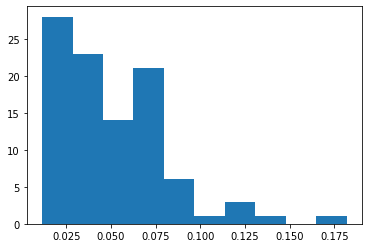

In [45]:
#trades2[trades2['Type']=='fbProphet']
#trades2.Type.unique()
#

plt.hist(trades2[trades2['Type']=='fbProphet+strategy']['expRet'], bins='auto')  # arguments are passed to np.histogram

In [46]:


set = pd.DataFrame()
for i in range(0,len(trades2)):
    value = pd.DataFrame(data.loc[pd.to_datetime(trades2.iloc[i]['Date'], errors='coerce').date()]).transpose().reset_index(drop=True)
    #value = pd.DataFrame(data.loc[trades2.iloc[i]['Date']]).transpose().reset_index(drop=True)
    value['index'] = i
    value['type'] = trades2.iloc[i]['Type']
    value['Date'] = trades2.iloc[i]['Date']
    value['ExpectedReturn'] = [trades2.iloc[i]['expRet']]
    value['sdev'] = trades2.iloc[i]['sdev']
    set = pd.concat([set,value.set_index('index')])




In [47]:

orderbook = pd.DataFrame()

#temp = pd.DataFrame([dateToBeSold,1],columns=['date','qty'])
column_names = ["date", "qty"]

sellDates = pd.DataFrame(columns = column_names)

#set[dateindex2[1].strftime('%Y-%m-%d')]
#need this becuase it's picking that extra date I set in yf.Download due to nyse having +1 day vs end_date in yf.Download
for i in pd.DataFrame(frequency).set_index(0)[end_date1:end_date].index[:-1]:
#for i in pd.DataFrame(frequency).set_index(0)[end_date1:end_date].index:
    
    idate = i.strftime('%Y-%m-%d')        
    
    #process purchases
    if (idate in set.set_index('Date').index):
        
        #innerSet = pd.DataFrame(set.set_index('Date').loc[idate]).transpose()
        innerSet = set.set_index('Date').loc[idate]
        
        #if isinstance(innerSet, pd.DataFrame):
            #print("pd")
        if isinstance(innerSet, pd.Series):
            #print("series")
            innerSet = pd.DataFrame(innerSet).transpose()

        #print(innerSet)
        types = innerSet.type.unique()
        #display(innerSet)

        for t in types:
            innerSet_t = innerSet[innerSet['type']==t]
            #print(innerSet[innerSet['type']==t])
            #print(innerSet_t)

            temp = pd.DataFrame()

            #estRet = set.set_index('Date').loc[idate]['ExpectedReturn']
            estRet = innerSet_t.loc[idate]['ExpectedReturn']

            temp['orderside'] = ['buy']        

            #if len(data[start_date:idate])-1+n_forward>=len(data[start_date:]):
                #dateToBesold = np.nan    
                #dateToBeSold = frequency[frequency.get_loc(idate)+n_forward].strftime('%Y-%m-%d')
                #frequency[pd.DataFrame(frequency).set_index('Date').index.get_loc(dateindex[i])+n_forward].strftime('%Y-%m-%d')
                #temp['valueAtSale'] = np.nan
            #else:

            if (innerSet_t['type'][0] == strategy) or (innerSet_t['type'][0] == 'fbProphet') or (innerSet_t['type'][0]=='fbProphet+strategy'):
                #dateToBeSold = data.iloc[len(data[start_date:idate])-1+n_forward].name.strftime('%Y-%m-%d') 
                dateToBeSold = frequency[frequency.get_loc(datetime.datetime.strptime(idate, "%Y-%m-%d").date())+n_forward].strftime('%Y-%m-%d')
                #frequency[pd.DataFrame(frequency).set_index('Date').index.get_loc(dateindex[i])+n_forward].strftime('%Y-%m-%d')
            else:
                dateToBeSold = frequency[frequency.get_loc(datetime.datetime.strptime(idate, "%Y-%m-%d").date())+1].strftime('%Y-%m-%d')

            #temp['valueAtSale'] = pd.DataFrame(data.iloc[len(data[start_date:idate])-1+n_forward]).transpose()['Close'].values[0]            
            if dateToBeSold in data.index:
                temp['valueAtSale'] = data.loc[dateToBeSold]['Close']
            else:
                temp['valueAtSale'] = np.nan

            #temp['valueAtSale'] = data.loc[dateToBeSold]['Close']

            temp['date'] = [idate]
            temp['valueAtPurchase'] = innerSet_t['Close'][0]
            temp['estRet'] = estRet
            temp['type'] = t
            #innerSet_t['type'][0]
            #temp['qty'] = Qty
            temp['dateBought'] = idate        
            temp['dateToBeSold'] = dateToBeSold

            btemp = pd.DataFrame(columns = column_names)
            btemp["date"]=[dateToBeSold]
            btemp["type"]=t
            #btemp["qty"]=[Qty]

            sellDates = sellDates.append(btemp,ignore_index=True)

            temp = temp.round(4)

            orderbook = orderbook.append(temp,ignore_index=True)
        
        

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [48]:
(orderbook[orderbook['type']=='SMA']['valueAtSale']>orderbook[orderbook['type']=='SMA']['valueAtPurchase']).agg("mean")

0.0

In [49]:
#temp['valueAtPurchase'] = 
#data.loc[dateBought]['Close']
#data.loc['2018-12-10']
#dateBought
#data.index.get_loc(dateBought)
#type(dateBought)
#type(data.index[0])
#datetime.date(dateBought)


In [50]:

#for i in dateindex2:
for i in sellDates.sort_values(by=['date'], ascending=True)['date'].unique():
#sellDates.set_index('date').index:
    
    idate = i
    #.strftime('%Y-%m-%d')        
    
    #process sales
        
    #if (idate in sellDates.set_index('date').index): 

    dateTypes = sellDates.set_index('date').loc[idate]
    if isinstance(dateTypes, pd.Series):
        dateTypes = pd.DataFrame(dateTypes).transpose()

    types = dateTypes['type'].unique()

    for t in types:
        #print(t)
        if (t == strategy) or (t == 'fbProphet') or (t == 'fbProphet+strategy'):

            dateBought = frequency[frequency.get_loc(datetime.datetime.strptime(idate, "%Y-%m-%d").date())-n_forward].strftime('%Y-%m-%d')
        else:
            dateBought = frequency[frequency.get_loc(datetime.datetime.strptime(idate, "%Y-%m-%d").date())-1].strftime('%Y-%m-%d')

        innerSet = set.set_index('Date').loc[dateBought]

        if isinstance(innerSet, pd.Series):
            innerSet = pd.DataFrame(innerSet).transpose()

        innerSet_t = innerSet[innerSet['type']==t]   
        #print([innerSet_t['ExpectedReturn']])

        temp = pd.DataFrame()            

        dateToBeSold = idate
        temp['dateBought'] = [dateBought]
        if dateToBeSold in data.index:                        
            temp['valueAtSale'] = data.loc[dateToBeSold]['Close']                    
        else:
            temp['valueAtSale'] = np.nan

        temp['valueAtPurchase'] = data.iloc[data.index.get_loc(datetime.datetime.strptime(dateBought, "%Y-%m-%d").date())]['Close']
        #data.loc[dateBought]['Close']

        temp['estRet'] = [innerSet_t['ExpectedReturn'][0]]
        temp['valueAtSale'] = data.iloc[data.index.get_loc(datetime.datetime.strptime(dateToBeSold, "%Y-%m-%d").date())]['Close']

        temp['orderside'] = ['sell']   
        temp['type'] = [t]
        temp['date'] = [idate]
        #print(temp)

        temp = temp.round(4)

        orderbook = orderbook.append(temp,ignore_index=True)

        #counter=counter+1
        #print(counter)
        #print(idate)


In [51]:
(orderbook[orderbook['type']=='fbProphet']['valueAtSale']>orderbook[orderbook['type']=='fbProphet']['valueAtPurchase']).agg("mean")

0.30383480825958703

In [52]:
display(orderbook.sort_values(by=['date','orderside','type'], ascending=True))


date  dateBought dateToBeSold  estRet orderside  \
1     2016-09-13  2016-09-13   2016-09-14  0.7024       buy   
2     2016-09-13  2016-09-13   2016-09-14  0.8642       buy   
0     2016-09-13  2016-09-13   2016-09-20  0.0411       buy   
4     2016-09-14  2016-09-14   2016-09-15  0.7024       buy   
5     2016-09-14  2016-09-14   2016-09-15  0.8660       buy   
3     2016-09-14  2016-09-14   2016-09-21  0.0274       buy   
2668  2016-09-14  2016-09-13          NaN  0.7024      sell   
2669  2016-09-14  2016-09-13          NaN  0.8642      sell   
7     2016-09-15  2016-09-15   2016-09-16  0.7024       buy   
8     2016-09-15  2016-09-15   2016-09-16  0.8613       buy   
6     2016-09-15  2016-09-15   2016-09-22  0.0150       buy   
2670  2016-09-15  2016-09-14          NaN  0.7024      sell   
2671  2016-09-15  2016-09-14          NaN  0.8660      sell   
10    2016-09-16  2016-09-16   2016-09-17  0.7023       buy   
11    2016-09-16  2016-09-16   2016-09-17  0.8610       buy   
9     2016-09-16  2016-09-16   2016-09-23  0.0067       buy   
2672  2016-09-16  2016-09-15          NaN  0.7024      sell   
2673  2016-09-16  2016-09-15          NaN  0.8613      sell   
12    2016-09-17  2016-09-17   2016-09-18  0.7023       buy   
13    2016-09-17  2016-09-17   2016-09-18  0.8596       buy   
2674  2016-09-17  2016-09-16          NaN  0.7023      sell   
2675  2016-09-17  2016-09-16          NaN  0.8610      sell   
14    2016-09-18  2016-09-18   2016-09-19  0.7023       buy   
15    2016-09-18  2016-09-18   2016-09-19  0.8644       buy   
2676  2016-09-18  2016-09-17          NaN  0.7023      sell   
2677  2016-09-18  2016-09-17          NaN  0.8596      sell   
16    2016-09-19  2016-09-19   2016-09-20  0.7023       buy   
17    2016-09-19  2016-09-19   2016-09-20  0.8635       buy   
2678  2016-09-19  2016-09-18          NaN  0.7023      sell   
2679  2016-09-19  2016-09-18          NaN  0.8644      sell   
18    2016-09-20  2016-09-20   2016-09-21  0.7023       buy   
19    2016-09-20  2016-09-20   2016-09-21  0.8622       buy   
2681  2016-09-20  2016-09-19          NaN  0.7023      sell   
2682  2016-09-20  2016-09-19          NaN  0.8635      sell   
2680  2016-09-20  2016-09-13          NaN  0.0411      sell   
21    2016-09-21  2016-09-21   2016-09-22  0.7027       buy   
22    2016-09-21  2016-09-21   2016-09-22  0.8474       buy   
20    2016-09-21  2016-09-21   2016-09-28  0.0052       buy   
2684  2016-09-21  2016-09-20          NaN  0.7023      sell   
2685  2016-09-21  2016-09-20          NaN  0.8622      sell   
2683  2016-09-21  2016-09-14          NaN  0.0274      sell   
24    2016-09-22  2016-09-22   2016-09-23  0.7027       buy   
25    2016-09-22  2016-09-22   2016-09-23  0.8462       buy   
23    2016-09-22  2016-09-22   2016-09-29  0.0075       buy   
2687  2016-09-22  2016-09-21          NaN  0.7027      sell   
2688  2016-09-22  2016-09-21          NaN  0.8474      sell   
2686  2016-09-22  2016-09-15          NaN  0.0150      sell   
26    2016-09-23  2016-09-23   2016-09-24  0.7032       buy   
27    2016-09-23  2016-09-23   2016-09-24  0.8545       buy   
2690  2016-09-23  2016-09-22          NaN  0.7027      sell   
2691  2016-09-23  2016-09-22          NaN  0.8462      sell   
2689  2016-09-23  2016-09-16          NaN  0.0067      sell   
28    2016-09-24  2016-09-24   2016-09-25  0.7033       buy   
29    2016-09-24  2016-09-24   2016-09-25  0.8541       buy   
2692  2016-09-24  2016-09-23          NaN  0.7032      sell   
2693  2016-09-24  2016-09-23          NaN  0.8545      sell   
31    2016-09-25  2016-09-25   2016-09-26  0.7033       buy   
32    2016-09-25  2016-09-25   2016-09-26  0.8517       buy   
30    2016-09-25  2016-09-25   2016-10-02  0.0094       buy   
2694  2016-09-25  2016-09-24          NaN  0.7033      sell   
2695  2016-09-25  2016-09-24          NaN  0.8541      sell   
34    2016-09-26  2016-09-26   2016-09-27  0.7033       buy   
35    2016-09-26  2016-09-26   2016-09-27  

In [53]:
orderbook[(orderbook['type']=='MACD')]

date  dateBought dateToBeSold  estRet orderside  type  \
61    2016-10-05  2016-10-05   2016-10-06  0.0004       buy  MACD   
67    2016-10-06  2016-10-06   2016-10-07  0.0009       buy  MACD   
71    2016-10-07  2016-10-07   2016-10-08  0.0014       buy  MACD   
75    2016-10-08  2016-10-08   2016-10-09  0.0019       buy  MACD   
79    2016-10-09  2016-10-09   2016-10-10  0.0024       buy  MACD   
83    2016-10-10  2016-10-10   2016-10-11  0.0030       buy  MACD   
88    2016-10-11  2016-10-11   2016-10-12  0.0041       buy  MACD   
93    2016-10-12  2016-10-12   2016-10-13  0.0054       buy  MACD   
99    2016-10-13  2016-10-13   2016-10-14  0.0066       buy  MACD   
103   2016-10-14  2016-10-14   2016-10-15  0.0077       buy  MACD   
107   2016-10-15  2016-10-15   2016-10-16  0.0087       buy  MACD   
111   2016-10-16  2016-10-16   2016-10-17  0.0096       buy  MACD   
115   2016-10-17  2016-10-17   2016-10-18  0.0104       buy  MACD   
119   2016-10-18  2016-10-18   2016-10-19  0.0111       buy  MACD   
125   2016-10-19  2016-10-19   2016-10-20  0.0116       buy  MACD   
131   2016-10-20  2016-10-20   2016-10-21  0.0120       buy  MACD   
135   2016-10-21  2016-10-21   2016-10-22  0.0122       buy  MACD   
139   2016-10-22  2016-10-22   2016-10-23  0.0128       buy  MACD   
145   2016-10-23  2016-10-23   2016-10-24  0.0134       buy  MACD   
149   2016-10-24  2016-10-24   2016-10-25  0.0142       buy  MACD   
155   2016-10-25  2016-10-25   2016-10-26  0.0151       buy  MACD   
160   2016-10-26  2016-10-26   2016-10-27  0.0164       buy  MACD   
164   2016-10-27  2016-10-27   2016-10-28  0.0180       buy  MACD   
168   2016-10-28  2016-10-28   2016-10-29  0.0197       buy  MACD   
172   2016-10-29  2016-10-29   2016-10-30  0.0219       buy  MACD   
176   2016-10-30  2016-10-30   2016-10-31  0.0240       buy  MACD   
180   2016-10-31  2016-10-31   2016-11-01  0.0258       buy  MACD   
184   2016-11-01  2016-11-01   2016-11-02  0.0277       buy  MACD   
188   2016-11-02  2016-11-02   2016-11-03  0.0296       buy  MACD   
192   2016-11-03  2016-11-03   2016-11-04  0.0306       buy  MACD   
196   2016-11-04  2016-11-04   2016-11-05  0.0313       buy  MACD   
200   2016-11-05  2016-11-05   2016-11-06  0.0318       buy  MACD   
203   2016-11-06  2016-11-06   2016-11-07  0.0321       buy  MACD   
206   2016-11-07  2016-11-07   2016-11-08  0.0323       buy  MACD   
209   2016-11-08  2016-11-08   2016-11-09  0.0324       buy  MACD   
213   2016-11-09  2016-11-09   2016-11-10  0.0325       buy  MACD   
217   2016-11-10  2016-11-10   2016-11-11  0.0326       buy  MACD   
220   2016-11-11  2016-11-11   2016-11-12  0.0326       buy  MACD   
223   2016-11-12  2016-11-12   2016-11-13  0.0326       buy  MACD   
226   2016-11-13  2016-11-13   2016-11-14  0.0324       buy  MACD   
229   2016-11-14  2016-11-14   2016-11-15  0.0321       buy  MACD   
232   2016-11-15  2016-11-15   2016-11-16  0.0319       buy  MACD   
235   2016-11-16  2016-11-16   2016-11-17  0.0325       buy  MACD   
239   2016-11-17  2016-11-17   2016-11-18  0.0333       buy  MACD   
243   2016-11-18  2016-11-18   2016-11-19  0.0343       buy  MACD   
246   2016-11-19  2016-11-19   2016-11-20  0.0353       buy  MACD   
250   2016-11-20  2016-11-20   2016-11-21  0.0360       buy  MACD   
254   2016-11-21  2016-11-21   2016-11-22  0.0364       buy  MACD   
257   2016-11-22  2016-11-22   2016-11-23  0.0370       buy  MACD   
262   2016-11-23  2016-11-23   2016-11-24  0.0374       buy  MACD   
268   2016-11-24  2016-11-24   2016-11-25  0.0376       buy  MACD   
274   2016-11-25  2016-11-25   2016-11-26  0.0376       buy  MACD   
280   2016-11-26  2016-11-26   2016-11-27  0.0376       buy  MACD   
284   2016-11-27  2016-11-27   2016-11-28  0.0374       buy  MACD   
288   2016-11-28  2016-11-28   2016-11-29  0.0371       buy  MACD   
292   2016-11-29  2016-11-29   2016-11-30  0.0367       buy  MACD   
298   2016-11-30  2016-11-30   2016-12-01  0.0363       buy  MACD   
304   2016

(array([ 74., 310., 218., 236.,  44.,  38.,  32.,  26.,  44.,  40.,  22.,
         24.,  12.,   8.,  10.,  10.,  12.,  14.,  12.,  10.,  12.,   8.,
          4.,  12.,   4.,   2.,   2.,   4.,   8.,   0.,   2.,   6.,   0.,
          4.,   0.,   2.,   0.,   2.,   2.,   0.,   2.,   0.,   0.,   6.,
          0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   2.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.]),
 array([3.00000000e-04, 1.29142857e-02, 2.55285714e-02, 3.81428571e-02,
        5.07571429e-02, 6.33714286e-02, 7.59857143e-02, 8.86000000e-02,
        1.01214286e-01, 1.13828571e-01, 1.26442857e-01, 1.39057143e-01,
        1.51671429e-01, 1.64285714e-01, 1.76900000e-01, 1.89514286e-01,
        2.02128571e-01, 2.14742857e-01, 2.27357143e-01, 2.39971429e-01,
        2.52585714e-01, 2.65200000e-01, 2.77814286e-01, 2.90428571e-01,
        3.03042857e-01, 3.15657143e-01, 3.28271429e-01, 3.40885714e-01,
        3.53500000

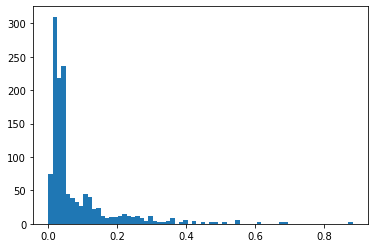

In [67]:

#filtered_orderbook = orderbook[(orderbook['type']=='fbProphet+strategy')]
#filtered_orderbook = orderbook[(orderbook['type']=='fbProphet')]
#filtered_orderbook = orderbook[(orderbook['type']==strategy)]
#filtered_orderbook = orderbook[(orderbook['type']=='MACD') & (orderbook['estRet']>=.04) | (orderbook['type']=='fbProphet') | (orderbook['type']==strategy)]
filtered_orderbook = orderbook[(orderbook['type']=='fbProphet') | (orderbook['type']==strategy)]
#filtered_orderbook = orderbook[(orderbook['type']=='MACD') & (orderbook['estRet']>=.04)]

#filtered_orderbook = orderbook[((orderbook['type']=='MACD') & (orderbook['estRet']>=.04) )| ((orderbook['type']=='fbProphet') | (orderbook['type']==strategy) |((orderbook['type']=='H') & (orderbook['estRet']>=1) )|( (orderbook['type']=='adf') & (orderbook['estRet']>=.9)) )]
#filtered_orderbook = filtered_orderbook.sort_values(by=['date','orderside','type'], ascending=True)
#display(filtered_orderbook.sort_values(by=['date','orderside','type'], ascending=True))
#display(filtered_orderbook)

plt.hist(filtered_orderbook['estRet'].dropna(), bins='auto')  # arguments are passed to np.histogram
#plt.hist(orderbook[orderbook['type']=='adf']['estRet'].dropna(), bins='auto')  # arguments are passed to np.histogram

In [68]:
filtered_orderbook

date  dateBought dateToBeSold  estRet orderside       type  \
0     2016-09-13  2016-09-13   2016-09-20  0.0411       buy  fbProphet   
3     2016-09-14  2016-09-14   2016-09-21  0.0274       buy  fbProphet   
6     2016-09-15  2016-09-15   2016-09-22  0.0150       buy  fbProphet   
9     2016-09-16  2016-09-16   2016-09-23  0.0067       buy  fbProphet   
20    2016-09-21  2016-09-21   2016-09-28  0.0052       buy  fbProphet   
23    2016-09-22  2016-09-22   2016-09-29  0.0075       buy  fbProphet   
30    2016-09-25  2016-09-25   2016-10-02  0.0094       buy  fbProphet   
33    2016-09-26  2016-09-26   2016-10-03  0.0009       buy  fbProphet   
36    2016-09-27  2016-09-27   2016-10-04  0.0057       buy  fbProphet   
39    2016-09-28  2016-09-28   2016-10-05  0.0116       buy  fbProphet   
42    2016-09-29  2016-09-29   2016-10-06  0.0130       buy  fbProphet   
45    2016-09-30  2016-09-30   2016-10-07  0.0114       buy  fbProphet   
48    2016-10-01  2016-10-01   2016-10-08  0.0058       buy  fbProphet   
51    2016-10-02  2016-10-02   2016-10-09  0.0131       buy  fbProphet   
54    2016-10-03  2016-10-03   2016-10-10  0.0098       buy  fbProphet   
57    2016-10-04  2016-10-04   2016-10-11  0.0109       buy  fbProphet   
60    2016-10-05  2016-10-05   2016-10-12  0.0057       buy  fbProphet   
64    2016-10-05  2016-10-05   2016-10-12  0.0227       buy        SMA   
66    2016-10-06  2016-10-06   2016-10-13  0.0139       buy  fbProphet   
70    2016-10-07  2016-10-07   2016-10-14  0.0121       buy  fbProphet   
74    2016-10-08  2016-10-08   2016-10-15  0.0117       buy  fbProphet   
78    2016-10-09  2016-10-09   2016-10-16  0.0194       buy  fbProphet   
82    2016-10-10  2016-10-10   2016-10-17  0.0280       buy  fbProphet   
86    2016-10-10  2016-10-10   2016-10-17  0.0231       buy        SMA   
91    2016-10-11  2016-10-11   2016-10-18  0.0237       buy        SMA   
92    2016-10-12  2016-10-12   2016-10-19  0.0071       buy  fbProphet   
96    2016-10-12  2016-10-12   2016-10-19  0.0234       buy        SMA   
98    2016-10-13  2016-10-13   2016-10-20  0.0182       buy  fbProphet   
102   2016-10-14  2016-10-14   2016-10-21  0.0217       buy  fbProphet   
106   2016-10-15  2016-10-15   2016-10-22  0.0264       buy  fbProphet   
110   2016-10-16  2016-10-16   2016-10-23  0.0205       buy  fbProphet   
114   2016-10-17  2016-10-17   2016-10-24  0.0284       buy  fbProphet   
118   2016-10-18  2016-10-18   2016-10-25  0.0307       buy  fbProphet   
122   2016-10-18  2016-10-18   2016-10-25  0.0242       buy        SMA   
124   2016-10-19  2016-10-19   2016-10-26  0.0405       buy  fbProphet   
128   2016-10-19  2016-10-19   2016-10-26  0.0219       buy        SMA   
130   2016-10-20  2016-10-20   2016-10-27  0.0411       buy  fbProphet   
134   2016-10-21  2016-10-21   2016-10-28  0.0425       buy  fbProphet   
138   2016-10-22  2016-10-22   2016-10-29  0.0006       buy  fbProphet   
142   2016-10-22  2016-10-22   2016-10-29  0.0224       buy        SMA   
144   2016-10-23  2016-10-23   2016-10-30  0.0014       buy  fbProphet   
148   2016-10-24  2016-10-24   2016-10-31  0.0061       buy  fbProphet   
152   2016-10-24  2016-10-24   2016-10-31  0.0237       buy        SMA   
154   2016-10-25  2016-10-25   2016-11-01  0.0067       buy  fbProphet   
158   2016-10-25  2016-10-25   2016-11-01  0.0233       buy        SMA   
163   2016-10-26  2016-10-26   2016-11-02  0.0241       buy        SMA   
167   2016-10-27  2016-10-27   2016-11-03  0.0208       buy        SMA   
171   2016-10-28  2016-10-28   2016-11-04  0.0210       buy        SMA   
175   2016-10-29  2016-10-29   2016-11-05  0.0215       buy        SMA   
179   2016-10-30  2016-10-30   2016-11-06  0.0200       buy        SMA   
183   2016-10-31  2016-10-31   2016-11-07  0.0198       buy        SMA   
187   2016-11-01  2016-11-01   2016-11-08  0.0198       buy        SMA   
191   2016-11-02  2016-11-02   2016-11-09  0.0202       buy        SMA   
195   2016-11-03

In [69]:
len(filtered_orderbook)

1286

In [70]:
filtered_orderbook.sort_values(by=['date','orderside','type'], ascending=True)

date  dateBought dateToBeSold  estRet orderside       type  \
0     2016-09-13  2016-09-13   2016-09-20  0.0411       buy  fbProphet   
3     2016-09-14  2016-09-14   2016-09-21  0.0274       buy  fbProphet   
6     2016-09-15  2016-09-15   2016-09-22  0.0150       buy  fbProphet   
9     2016-09-16  2016-09-16   2016-09-23  0.0067       buy  fbProphet   
2680  2016-09-20  2016-09-13          NaN  0.0411      sell  fbProphet   
20    2016-09-21  2016-09-21   2016-09-28  0.0052       buy  fbProphet   
2683  2016-09-21  2016-09-14          NaN  0.0274      sell  fbProphet   
23    2016-09-22  2016-09-22   2016-09-29  0.0075       buy  fbProphet   
2686  2016-09-22  2016-09-15          NaN  0.0150      sell  fbProphet   
2689  2016-09-23  2016-09-16          NaN  0.0067      sell  fbProphet   
30    2016-09-25  2016-09-25   2016-10-02  0.0094       buy  fbProphet   
33    2016-09-26  2016-09-26   2016-10-03  0.0009       buy  fbProphet   
36    2016-09-27  2016-09-27   2016-10-04  0.0057       buy  fbProphet   
39    2016-09-28  2016-09-28   2016-10-05  0.0116       buy  fbProphet   
2700  2016-09-28  2016-09-21          NaN  0.0052      sell  fbProphet   
42    2016-09-29  2016-09-29   2016-10-06  0.0130       buy  fbProphet   
2703  2016-09-29  2016-09-22          NaN  0.0075      sell  fbProphet   
45    2016-09-30  2016-09-30   2016-10-07  0.0114       buy  fbProphet   
48    2016-10-01  2016-10-01   2016-10-08  0.0058       buy  fbProphet   
51    2016-10-02  2016-10-02   2016-10-09  0.0131       buy  fbProphet   
2710  2016-10-02  2016-09-25          NaN  0.0094      sell  fbProphet   
54    2016-10-03  2016-10-03   2016-10-10  0.0098       buy  fbProphet   
2713  2016-10-03  2016-09-26          NaN  0.0009      sell  fbProphet   
57    2016-10-04  2016-10-04   2016-10-11  0.0109       buy  fbProphet   
2716  2016-10-04  2016-09-27          NaN  0.0057      sell  fbProphet   
64    2016-10-05  2016-10-05   2016-10-12  0.0227       buy        SMA   
60    2016-10-05  2016-10-05   2016-10-12  0.0057       buy  fbProphet   
2719  2016-10-05  2016-09-28          NaN  0.0116      sell  fbProphet   
66    2016-10-06  2016-10-06   2016-10-13  0.0139       buy  fbProphet   
2722  2016-10-06  2016-09-29          NaN  0.0130      sell  fbProphet   
70    2016-10-07  2016-10-07   2016-10-14  0.0121       buy  fbProphet   
2726  2016-10-07  2016-09-30          NaN  0.0114      sell  fbProphet   
74    2016-10-08  2016-10-08   2016-10-15  0.0117       buy  fbProphet   
2730  2016-10-08  2016-10-01          NaN  0.0058      sell  fbProphet   
78    2016-10-09  2016-10-09   2016-10-16  0.0194       buy  fbProphet   
2734  2016-10-09  2016-10-02          NaN  0.0131      sell  fbProphet   
86    2016-10-10  2016-10-10   2016-10-17  0.0231       buy        SMA   
82    2016-10-10  2016-10-10   2016-10-17  0.0280       buy  fbProphet   
2738  2016-10-10  2016-10-03          NaN  0.0098      sell  fbProphet   
91    2016-10-11  2016-10-11   2016-10-18  0.0237       buy        SMA   
2742  2016-10-11  2016-10-04          NaN  0.0109      sell  fbProphet   
96    2016-10-12  2016-10-12   2016-10-19  0.0234       buy        SMA   
92    2016-10-12  2016-10-12   2016-10-19  0.0071       buy  fbProphet   
2747  2016-10-12  2016-10-05          NaN  0.0227      sell        SMA   
2746  2016-10-12  2016-10-05          NaN  0.0057      sell  fbProphet   
98    2016-10-13  2016-10-13   2016-10-20  0.0182       buy  fbProphet   
2752  2016-10-13  2016-10-06          NaN  0.0139      sell  fbProphet   
102   2016-10-14  2016-10-14   2016-10-21  0.0217       buy  fbProphet   
2756  2016-10-14  2016-10-07          NaN  0.0121      sell  fbProphet   
106   2016-10-15  2016-10-15   2016-10-22  0.0264       buy  fbProphet   
2760  2016-10-15  2016-10-08          NaN  0.0117      sell  fbProphet   
110   2016-10-16  2016-10-16   2016-10-23  0.0205       buy  fbProphet   
2764  2016-10-16  2016-10-09          NaN  0.0194      sell  fbProphet   
114   2016-10-17

In [71]:

funds = 1000
BuyFundsPercent = 1
percentHeldOnSell = 1

buyLog = pd.DataFrame()
sellLog = pd.DataFrame()
runningLog = pd.DataFrame()

held = 0
upper = 0
lower = 0

#weights = [3,2,1]

#weights2 = 1/np.array(weights)/sum(1/np.array(weights))

weights2 = [.125, .25, .5, .75]

for i in pd.DataFrame(frequency).set_index(0)[end_date1:end_date].index[:-1]:
#for i in pd.DataFrame(frequency).set_index(0)[end_date1:end_date].index:
    
    
    temp = pd.DataFrame()
    rtemp = pd.DataFrame()
    _temp = pd.DataFrame()
    
    t = i.strftime('%Y-%m-%d')
    
    subset = filtered_orderbook[filtered_orderbook['date']==t]
        
    gain = 0
    paid = 0

    if len(subset) != 0:
        print()
        print("date " + str(i))
        print(subset)
        
        sales = subset[subset['orderside'] == 'sell']        
        types_s = sales['type'].unique()
        
        for ts_ in types_s:
            
            sales_t = sales[sales['type']==ts_]

            if len(sales_t) != 0:                        

                oldvalue = sales_t['valueAtPurchase'].values[0]

                newvalue = sales_t['valueAtSale'].values[0]      
                
                bl = buyLog.set_index('date').loc[datetime.datetime.strptime(sales_t['dateBought'].values[0], "%Y-%m-%d").date()]
                #buyLog.set_index('date').loc[sales_t['dateBought'].values[0]]
                
                if isinstance(bl, pd.Series):
                    bl = pd.DataFrame(bl).transpose()
                
                Qty = bl[bl['type']==ts_]['qty'][0]
                    
                gain = gain + (newvalue * Qty)

                _temp['date'] = [i]
                _temp['type'] = [ts_]
                _temp['qty'] = [Qty]
                
                sellLog = pd.concat([sellLog,_temp])                
    
        purchases = subset[subset['orderside'] == 'buy']
        
        types_p = purchases['type'].unique()
        
        for tp in types_p:
            
            purchases_t = purchases[purchases['type']==tp]

            if len(purchases_t) != 0:
                
                weights = [3,2,1]                

                #print(tp)
                if tp == 'adf': BuyFundsPercent_ = BuyFundsPercent * weights2[0]
                if tp == 'H': BuyFundsPercent_ = BuyFundsPercent * weights2[0]
                if tp == 'MACD': BuyFundsPercent_ = BuyFundsPercent * weights2[1]                
                if tp == strategy: BuyFundsPercent_ = BuyFundsPercent * weights2[2]
                if tp == 'fbProphet': BuyFundsPercent_ = BuyFundsPercent * weights2[3]   
                if tp == 'fbProphet+strategy': BuyFundsPercent_ = BuyFundsPercent * weights2[3]   
                
                ProportionOfFunds = funds * BuyFundsPercent_

                Qty = ProportionOfFunds / purchases_t['valueAtPurchase'].values[0]
                Qty = Qty.round(6)
                #print(purchases['valueAtPurchase'].values[0])
                #print("Qty purchased " + str(Qty.round(2)))

                temp['date'] = [i]
                temp['type'] = [tp]
                temp['qty'] = [Qty]

                paid = purchases_t['valueAtPurchase'].values[0]*Qty
                
                print("buy")
                print(temp)

                buyLog = pd.concat([buyLog,temp])

                #print(buyLog)
                
                funds = funds - paid           

        funds = funds + gain
        
        rtemp['date'] =  [i]
        rtemp['funds'] =  [funds]
        
        if len(sellLog) != 0:
            remainder = (sum(buyLog['qty'])-sum(sellLog['qty']))            
            
        else:
            remainder = (sum(buyLog['qty']))
        
        rtemp['held'] = format(remainder,".6f")
        
        #print(remainder)
        rtemp['value'] = remainder * data.loc[i]['Close']
        rtemp['portValue'] = funds + remainder * data.loc[i]['Close']
        #print(rtemp)
                
        #print("in " + str(gain))
        #print("out " + str(paid))
        #print("held: " + str(remainder))
        #print("Close Value: " + str(data.loc[i]['Close']))
        #print("held Value: " + str(remainder * data.loc[i]['Close']))
        #print("funds " + str(funds))
        #print("portValue " + str(funds + remainder * data.loc[i]['Close']))
        #print()
            
        runningLog = runningLog.append(rtemp)
        
funds = 1000                                                    
                


date 2016-09-13
         date  dateBought dateToBeSold  estRet orderside       type  \
0  2016-09-13  2016-09-13   2016-09-20  0.0411       buy  fbProphet   

   valueAtPurchase  valueAtSale  
0           609.24          NaN  
buy
         date       type       qty
0  2016-09-13  fbProphet  1.231042

date 2016-09-14
         date  dateBought dateToBeSold  estRet orderside       type  \
3  2016-09-14  2016-09-14   2016-09-21  0.0274       buy  fbProphet   

   valueAtPurchase  valueAtSale  
3           610.68          NaN  
buy
         date       type       qty
0  2016-09-14  fbProphet  0.307035

date 2016-09-15
         date  dateBought dateToBeSold  estRet orderside       type  \
6  2016-09-15  2016-09-15   2016-09-22   0.015       buy  fbProphet   

   valueAtPurchase  valueAtSale  
6           607.16          NaN  
buy
         date       type       qty
0  2016-09-15  fbProphet  0.077204

date 2016-09-16
         date  dateBought dateToBeSold  estRet orderside       type  \
9  201

In [72]:
sellDates

date  qty                type
0     2016-09-20  NaN           fbProphet
1     2016-09-14  NaN                   H
2     2016-09-14  NaN                 adf
3     2016-09-21  NaN           fbProphet
4     2016-09-15  NaN                   H
5     2016-09-15  NaN                 adf
6     2016-09-22  NaN           fbProphet
7     2016-09-16  NaN                   H
8     2016-09-16  NaN                 adf
9     2016-09-23  NaN           fbProphet
10    2016-09-17  NaN                   H
11    2016-09-17  NaN                 adf
12    2016-09-18  NaN                   H
13    2016-09-18  NaN                 adf
14    2016-09-19  NaN                   H
15    2016-09-19  NaN                 adf
16    2016-09-20  NaN                   H
17    2016-09-20  NaN                 adf
18    2016-09-21  NaN                   H
19    2016-09-21  NaN                 adf
20    2016-09-28  NaN           fbProphet
21    2016-09-22  NaN                   H
22    2016-09-22  NaN                 adf
23    2016-09-29  NaN           fbProphet
24    2016-09-23  NaN                   H
25    2016-09-23  NaN                 adf
26    2016-09-24  NaN                   H
27    2016-09-24  NaN                 adf
28    2016-09-25  NaN                   H
29    2016-09-25  NaN                 adf
30    2016-10-02  NaN           fbProphet
31    2016-09-26  NaN                   H
32    2016-09-26  NaN                 adf
33    2016-10-03  NaN           fbProphet
34    2016-09-27  NaN                   H
35    2016-09-27  NaN                 adf
36    2016-10-04  NaN           fbProphet
37    2016-09-28  NaN                   H
38    2016-09-28  NaN                 adf
39    2016-10-05  NaN           fbProphet
40    2016-09-29  NaN                   H
41    2016-09-29  NaN                 adf
42    2016-10-06  NaN           fbProphet
43    2016-09-30  NaN                   H
44    2016-09-30  NaN                 adf
45    2016-10-07  NaN           fbProphet
46    2016-10-01  NaN                   H
47    2016-10-01  NaN                 adf
48    2016-10-08  NaN           fbProphet
49    2016-10-02  NaN                   H
50    2016-10-02  NaN                 adf
51    2016-10-09  NaN           fbProphet
52    2016-10-03  NaN                   H
53    2016-10-03  NaN                 adf
54    2016-10-10  NaN           fbProphet
55    2016-10-04  NaN                   H
56    2016-10-04  NaN                 adf
57    2016-10-11  NaN           fbProphet
58    2016-10-05  NaN                   H
59    2016-10-05  NaN                 adf
60    2016-10-12  NaN           fbProphet
61    2016-10-06  NaN                MACD
62    2016-10-06  NaN                   H
63    2016-10-06  NaN                 adf
64    2016-10-12  NaN                 SMA
65    2016-10-12  NaN  fbProphet+strategy
66    2016-10-13  NaN           fbProphet
67    2016-10-07  NaN                MACD
68    2016-10-07  NaN                   H
69    2016-10-07  NaN                 adf
70    2016-10-14  NaN           fbProphet
71    2016-10-08  NaN                MACD
72    2016-10-08  NaN                   H
73    2016-10-08  NaN                 adf
74    2016-10-15  NaN           fbProphet
75    2016-10-09  NaN                MACD
76    2016-10-09  NaN                   H
77    2016-10-09  NaN                 adf
78    2016-10-16  NaN           fbProphet
79    2016-10-10  NaN                MACD
80    2016-10-10  NaN                   H
81    2016-10-10  NaN                 adf
82    2016-10-17  NaN           fbProphet
83    2016-10-11  NaN                MACD
84    2016-10-11  NaN                   H
85    2016-10-11  NaN                 adf
86    2016-10-17  NaN                 SMA
87    2016-10-17  NaN  fbProphet+strategy
88    2016-10-12  NaN                MACD
89    2016-10-12  NaN                   H
90    2016-10-12  NaN                 adf
91    2016-10-18  NaN                 SMA
92    2016-10-19  NaN           fbProphet
93    2016-10-13  NaN                MACD
94    2016-10-13  NaN 

In [73]:
#sellLog['orderSide'] = 'sale'
#sellLog['cumsum'] = cumsum(sellLog['qty'])
#buyLog['orderSide'] = 'buy'
#buyLog['cumsum'] = cumsum(buyLog['qty'])

In [74]:
len(orderbook[orderbook['orderside']=='buy'])-len(orderbook[orderbook['orderside']=='sell'])

0

In [75]:
runningLog

date        funds      held         value     portValue
0  2016-09-13   249.999972  1.231042    750.000028   1000.000000
0  2016-09-14    62.499838  1.538077    939.272862   1001.772700
0  2016-09-15    15.624657  1.615281    980.734012    996.358669
0  2016-09-16     3.905888  1.634588    992.145878    996.051766
0  2016-09-20   752.761047  0.403546    245.481067    998.242114
0  2016-09-21   371.536307  1.041953    622.202234    993.738541
0  2016-09-22   138.920869  1.432051    853.932011    992.852881
0  2016-09-23   150.559901  1.412744    851.658593   1002.218494
0  2016-09-25    37.639911  1.600684    961.738968    999.378879
0  2016-09-26     9.409830  1.647112   1001.509980   1010.919810
0  2016-09-27     2.352193  1.658755   1005.487518   1007.839711
0  2016-09-28   572.325336  0.716230    433.125768   1005.451104
0  2016-09-29   426.121461  0.957614    580.017224   1006.138684
0  2016-09-30   106.530262  1.481766    903.477183   1010.007445
0  2016-10-01    26.632430  1.611897    989.672520   1016.304951
0  2016-10-02   121.468827  1.456654    889.855362   1011.324189
0  2016-10-03    58.787327  1.559053    954.343113   1013.130440
0  2016-10-04    21.801274  1.619666    988.320193   1010.121467
0  2016-10-05     4.511954  1.647893   1009.350941   1013.862896
0  2016-10-06   435.566776  0.944727    579.136546   1014.703321
0  2016-10-07   432.356518  0.949929    586.220184   1018.576702
0  2016-10-08   188.654391  1.343562    831.812670   1020.467061
0  2016-10-09    67.329181  1.540279    949.967073   1017.296254
0  2016-10-10   100.538614  1.486628    920.207866   1020.746479
0  2016-10-11    96.590264  1.492787    956.980962   1053.571226
0  2016-10-12    31.887196  1.594491   1014.399229   1046.286425
0  2016-10-13    11.486991  1.626527   1035.756128   1047.243120
0  2016-10-14   341.859674  1.110626    711.222678   1053.082352
0  2016-10-15   419.966569  0.988326    631.194400   1051.160969
0  2016-10-16   252.190590  1.249810    801.915590   1054.106180
0  2016-10-17   123.883424  1.450544    927.173219   1051.056644
0  2016-10-18    65.511360  1.542042    983.761114   1049.272475
0  2016-10-19    91.952216  1.500107    945.847466   1037.799682
0  2016-10-20    46.680441  1.571869    991.629277   1038.309718
0  2016-10-21    20.183849  1.613739   1021.222451   1041.406300
0  2016-10-22   266.401397  1.239144    814.476960   1080.878356
0  2016-10-23   389.154557  1.052325    691.451188   1080.605745
0  2016-10-24   242.098436  1.277264    835.024113   1077.122549
0  2016-10-25   141.995483  1.429491    940.018987   1082.014470
0  2016-10-26   132.664110  1.443248    978.955118   1111.619229
0  2016-10-27   141.577036  1.430299    984.489105   1126.066141
0  2016-10-28   108.942109  1.477620   1019.040633   1127.982742
0  2016-10-29    73.668231  1.526990   1091.003815   1164.672046
0  2016-10-30   250.254803  1.275392    895.146629   1145.401433
0  2016-10-31   490.226976  0.933049    654.039358   1144.266334
0  2016-11-01   480.207689  0.946778    690.949117   1171.156806
0  2016-11-02   317.646622  1.166209    863.962613   1181.609235
0  2016-11-03   225.192779  1.300453    895.621981   1120.814760
0  2016-11-04   184.778854  1.357922    954.931488   1139.710342
0  2016-11-05   238.406891  1.281683    901.561456   1139.968347
0  2016-11-06   275.748172  1.229202    874.601807   1150.349979
0  2016-11-07   401.261096  1.050696    738.775878   1140.036975
0  2016-11-08   439.047122  0.997465    708.050530   1147.097652
0  2016-11-09   453.936358  0.976879    706.547274   1160.483632
0  2016-11-10   618.946878  0.746266    533.975711   1152.922589
0  2016-11-11   733.653432  0.586153    419.925871   1153.579303
0  2016-11-15   934.784286  0.303515    215.987344   1150.771630
0  2016-11-16   693.268315  0.628046    467.391833   1160.660149
0  2016-11-17   346.634166  1.095851    812.003674   1158.637840
0  2016-11-19   173.317359  1.326442    996.980336   1170.297695
0  2016-11-20    86.658870  1.444985   1056.

In [76]:
#new = sellLog.append(buyLog).sort_values(by=['date'], ascending=True)
#new[new['orderSide']=='sale']
#new

In [77]:
if end_date.strftime('%Y-%m-%d') != runningLog['date'].iloc[-1].strftime('%Y-%m-%d'):
    rl_temp = pd.DataFrame()
    rl_temp['date'] = [end_date]
    rl_temp['funds'] = [runningLog.iloc[-1]['funds']]
    rl_temp['held'] = [runningLog.iloc[-1]['held']]
    rl_temp['value'] = [runningLog.iloc[-1]['value']]
    rl_temp['portValue'] = [runningLog.iloc[-1]['portValue']]
    runningLog = runningLog.append(rl_temp)
    
    runningLog = runningLog.sort_values(by=['date'], ascending=True)
    
if end_date1.strftime('%Y-%m-%d') != runningLog['date'].iloc[0].strftime('%Y-%m-%d'):
    rl_temp = pd.DataFrame()
    rl_temp['date'] = [end_date1]
    rl_temp['funds'] = [funds]
    rl_temp['held'] = [0]
    rl_temp['value'] = [0]
    rl_temp['portValue'] = [funds]
    runningLog = runningLog.append(rl_temp)

    runningLog = runningLog.sort_values(by=['date'], ascending=True)


In [78]:
ret_data =  runningLog.set_index(pd.to_datetime(runningLog['date'], format='%Y-%m-%d'))['portValue'].pct_change()
#ret_data['date'] = pd.to_datetime(runningLog['date'], format='%Y-%m-%d')
ret_data

date
2016-09-13             NaN
2016-09-14    1.772700e-03
2016-09-15   -5.404451e-03
2016-09-16   -3.080250e-04
2016-09-20    2.199030e-03
2016-09-21   -4.511504e-03
2016-09-22   -8.912405e-04
2016-09-23    9.433033e-03
2016-09-25   -2.833330e-03
2016-09-26    1.154810e-02
2016-09-27   -3.046829e-03
2016-09-28   -2.370027e-03
2016-09-29    6.838530e-04
2016-09-30    3.845156e-03
2016-10-01    6.235108e-03
2016-10-02   -4.900854e-03
2016-10-03    1.786026e-03
2016-10-04   -2.969975e-03
2016-10-05    3.703939e-03
2016-10-06    8.289340e-04
2016-10-07    3.817254e-03
2016-10-08    1.855883e-03
2016-10-09   -3.107211e-03
2016-10-10    3.391564e-03
2016-10-11    3.215759e-02
2016-10-12   -6.914388e-03
2016-10-13    9.143716e-04
2016-10-14    5.575813e-03
2016-10-15   -1.824533e-03
2016-10-16    2.801865e-03
2016-10-17   -2.893007e-03
2016-10-18   -1.697500e-03
2016-10-19   -1.093405e-02
2016-10-20    4.914594e-04
2016-10-21    2.982330e-03
2016-10-22    3.790265e-02
2016-10-23   -2.522131e

0
2016-09-14         NaN
2016-09-15    0.010109
2016-09-16   -0.003772
2016-09-17   -0.000006
2016-09-18   -0.000006
2016-09-19   -0.000006
2016-09-20    0.000299
2016-09-21    0.010917
2016-09-22    0.006500
2016-09-23   -0.005737
2016-09-24   -0.002863
2016-09-25   -0.002871
2016-09-26   -0.002879
2016-09-27    0.006444
2016-09-28    0.005296
2016-09-29   -0.009321
2016-09-30    0.007968
2016-10-01   -0.001087
2016-10-02   -0.001088
2016-10-03   -0.001089
2016-10-04   -0.004956
2016-10-05    0.004297
2016-10-06    0.000482
2016-10-07   -0.003253
2016-10-08    0.001535
2016-10-09    0.001533
2016-10-10    0.001531
2016-10-11   -0.012447
2016-10-12    0.001147
2016-10-13   -0.003099
2016-10-14    0.000202
2016-10-15   -0.001013
2016-10-16   -0.001014
2016-10-17   -0.001015
2016-10-18    0.006160
2016-10-19    0.002192
2016-10-20   -0.001376
2016-10-21   -0.000084
2016-10-22    0.001583
2016-10-23    0.001581
2016-10-24    0.001578
2016-10-25   -0.003798
2016-10-26   -0.001740
2016-10-2

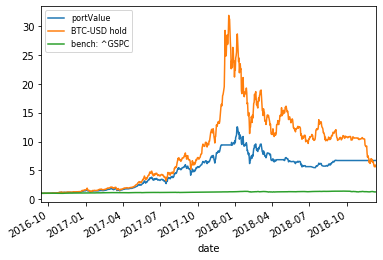

6.699244050239999


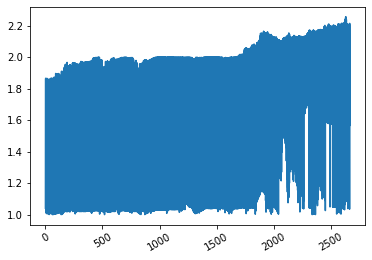

6.699244050239999
2.2941560347185677


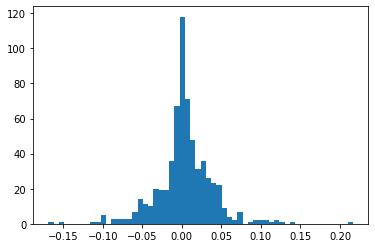

In [85]:

#ret_data =  runningLog.set_index('date')['portValue'].pct_change()
ret_data =  runningLog.set_index(pd.to_datetime(runningLog['date'], format='%Y-%m-%d'))['portValue'].pct_change()
cumulative_ret_data = (ret_data + 1).cumprod()

#data
ret_data2 = data[runningLog.set_index('date').index[1]:runningLog.set_index('date').index[-1]]['Close'].pct_change()
cum_ret_data2 = (ret_data2 + 1).cumprod()

#benchData
sp500_data = benchData[runningLog.set_index('date').index[1]:runningLog.set_index('date').index[-1]]['Close'].pct_change()
sp500_cumulative_ret_data = (sp500_data + 1).cumprod()

cumulative_ret_data.dropna().plot()

plt.plot(cum_ret_data2,label=name + " hold")
plt.plot(sp500_cumulative_ret_data,label="bench: " + benchName)
plt.legend(loc="upper left",fontsize=8)

plt.xticks(rotation=30) 

plt.show()

print(cumulative_ret_data[-1])

plt.plot((set['ExpectedReturn']+1))
plt.xticks(rotation=30) 
#len(set['ExpectedReturn']+1)

runningLog

plt.show()
print(cumulative_ret_data.iloc[-1])
plt.hist(runningLog.set_index('date')['portValue'].pct_change().dropna(), bins='auto')  # arguments are passed to np.histogram
print(runningLog['portValue'].dropna().pct_change().sum())

